<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




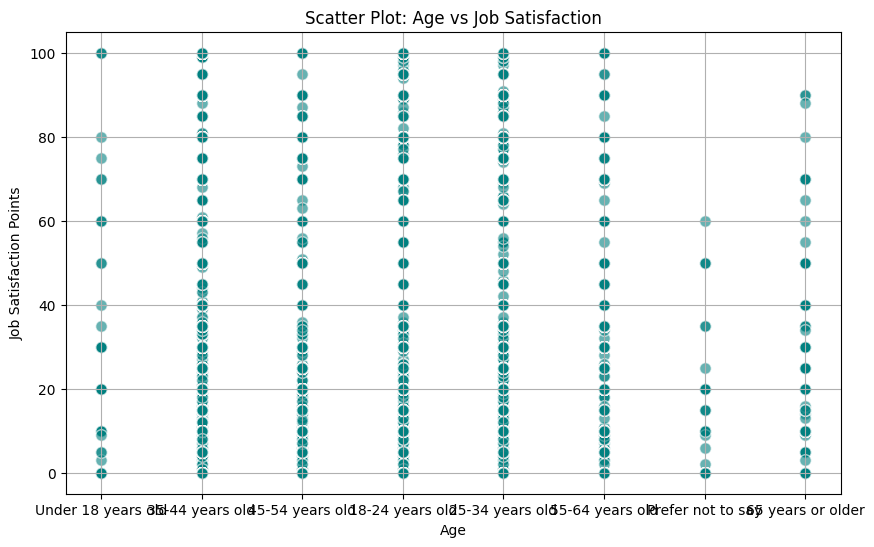

In [3]:
# Plot Age vs Job Satisfaction
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.6, color='teal', edgecolors='w', s=70)
plt.title("Scatter Plot: Age vs Job Satisfaction")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction Points")
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


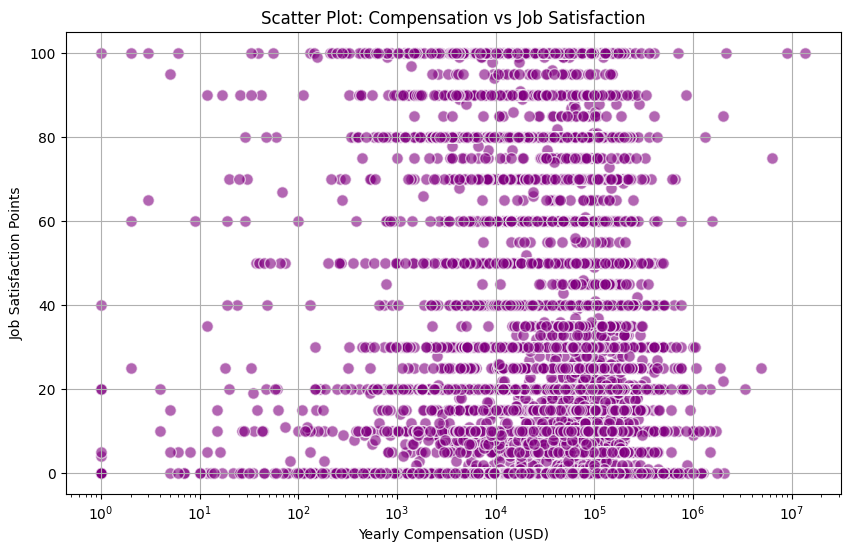

In [11]:
# Remove rows with missing values in relevant columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df_clean['ConvertedCompYearly'], df_clean['JobSatPoints_6'], alpha=0.6, color='purple', edgecolors='w', s=70)
plt.title("Scatter Plot: Compensation vs Job Satisfaction")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction Points")
plt.xscale('log')  # optional: use log scale for skewed compensation
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [15]:
# Convert to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Count valid numeric rows
valid_rows = df[['Age', 'JobSatPoints_6']].dropna()
print(f"Number of valid numeric rows: {len(valid_rows)}")
df_clean = df[['Age', 'JobSatPoints_6']].dropna()

# Check first few rows
print(df_clean.head())
import numpy as np
import matplotlib.pyplot as plt

if not df_clean.empty:
    z = np.polyfit(df_clean['Age'], df_clean['JobSatPoints_6'], 1)
    p = np.poly1d(z)

    plt.figure(figsize=(10,6))
    plt.scatter(df_clean['Age'], df_clean['JobSatPoints_6'], alpha=0.6, color='teal', edgecolors='w', s=70)
    plt.plot(df_clean['Age'], p(df_clean['Age']), color='red', linewidth=2, label='Trend Line')
    plt.title("Age vs Job Satisfaction with Trend Line")
    plt.xlabel("Age")
    plt.ylabel("Job Satisfaction Points")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid numeric data available for Age and JobSatPoints_6.")


Number of valid numeric rows: 0
Empty DataFrame
Columns: [Age, JobSatPoints_6]
Index: []
No valid numeric data available for Age and JobSatPoints_6.


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


Number of valid rows: 0


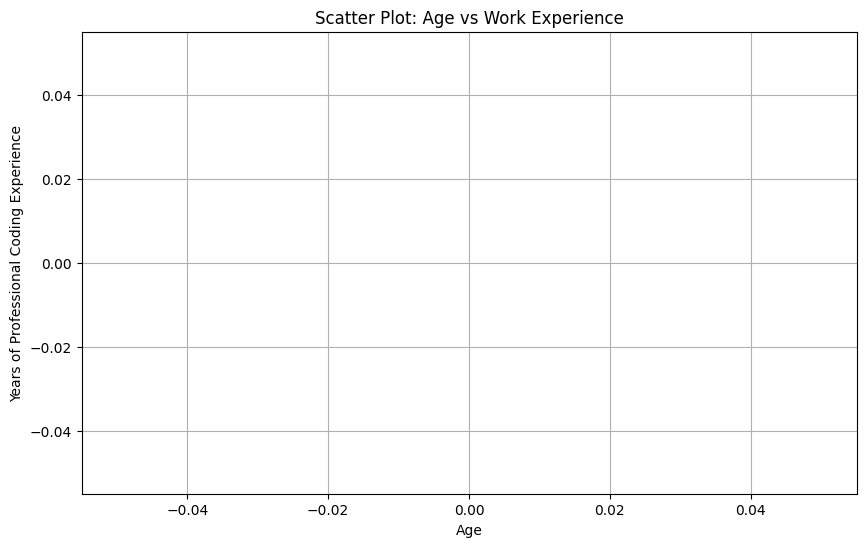

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert YearsCodePro to numeric
def convert_years(x):
    if pd.isnull(x):
        return np.nan
    elif x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

df['YearsCodePro_Num'] = df['YearsCodePro'].apply(convert_years)

# Drop rows where either column is missing
df_clean = df.dropna(subset=['Age', 'YearsCodePro_Num'])

# Check if there is any data left
print(f"Number of valid rows: {len(df_clean)}")

plt.figure(figsize=(10,6))
plt.scatter(df_clean['Age'], df_clean['YearsCodePro_Num'], alpha=0.6, color='orange', edgecolors='w', s=70)
plt.title("Scatter Plot: Age vs Work Experience")
plt.xlabel("Age")
plt.ylabel("Years of Professional Coding Experience")
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


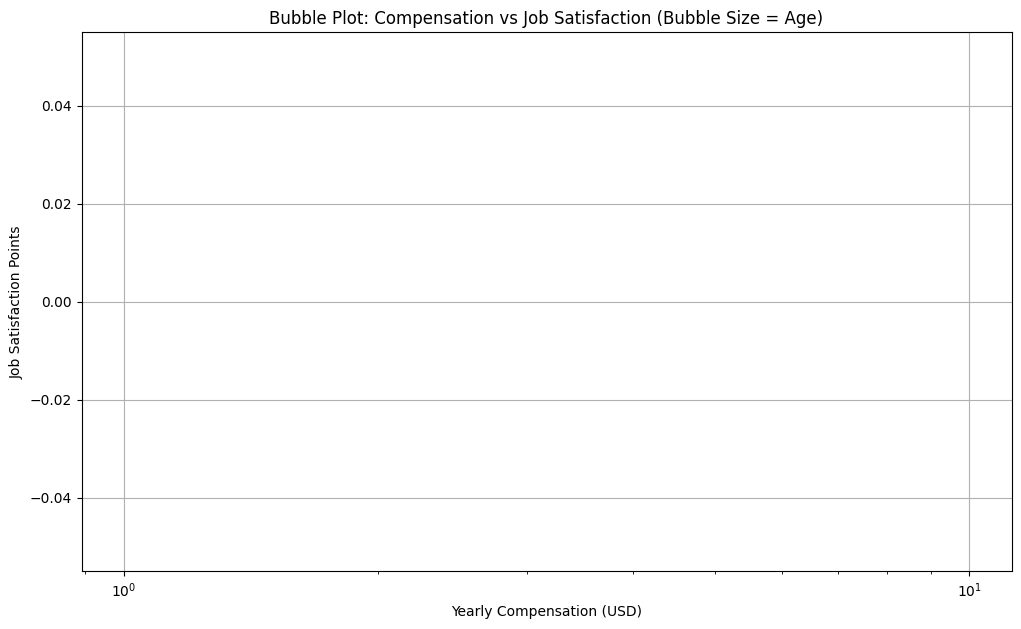

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numeric and handle errors
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing values in the three columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])
plt.figure(figsize=(12,7))

# Bubble plot: size proportional to Age
plt.scatter(
    df_clean['ConvertedCompYearly'], 
    df_clean['JobSatPoints_6'], 
    s=df_clean['Age']*2,  # scale bubble size
    alpha=0.6, 
    color='skyblue', 
    edgecolors='w'
)

plt.xscale('log')  # Optional: log scale for highly skewed compensation
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction Points")
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


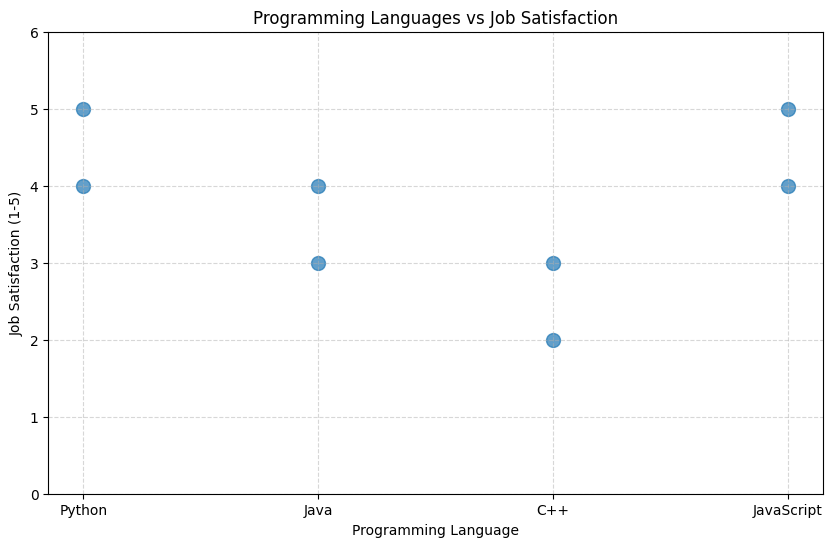

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data: replace with your actual dataset
data = {
    'LanguageHaveWorkedWith': ['Python', 'Python', 'Java', 'Java', 'C++', 'C++', 'JavaScript', 'JavaScript'],
    'JobSatisfaction': [4, 5, 3, 4, 2, 3, 5, 4]
}

df = pd.DataFrame(data)

# Convert categorical language names to numeric positions for plotting
languages = df['LanguageHaveWorkedWith'].unique()
lang_to_num = {lang: i for i, lang in enumerate(languages)}
df['LanguageNum'] = df['LanguageHaveWorkedWith'].map(lang_to_num)

plt.figure(figsize=(10,6))
plt.scatter(df['LanguageNum'], df['JobSatisfaction'], s=100, alpha=0.7)

# Customize x-axis to show language names
plt.xticks(ticks=np.arange(len(languages)), labels=languages)

plt.title('Programming Languages vs Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (1-5)')
plt.ylim(0, 6)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


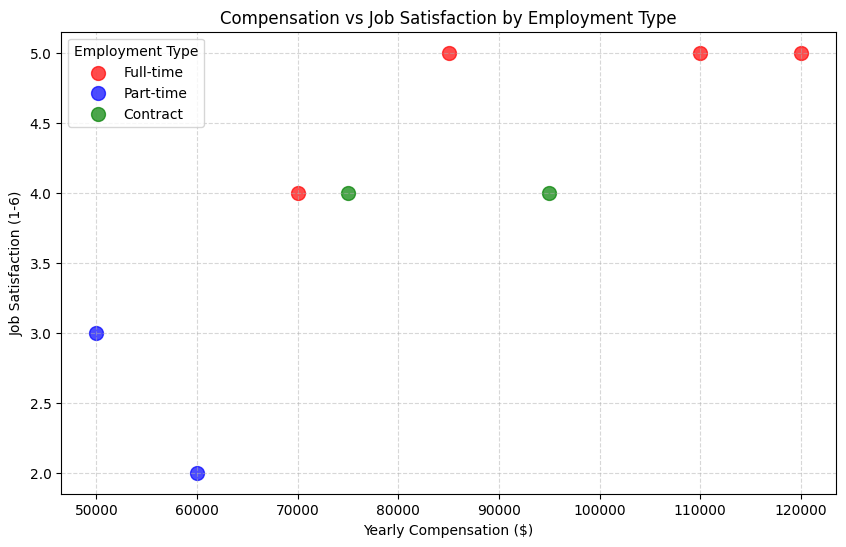

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: replace this with your actual dataset
data = {
    'ConvertedCompYearly': [70000, 85000, 50000, 120000, 95000, 60000, 75000, 110000],
    'JobSatPoints_6': [4, 5, 3, 5, 4, 2, 4, 5],
    'Employment': ['Full-time', 'Full-time', 'Part-time', 'Full-time', 'Contract', 'Part-time', 'Contract', 'Full-time']
}

df = pd.DataFrame(data)

# Get unique employment types and assign colors
employment_types = df['Employment'].unique()
colors = ['red', 'blue', 'green']  # Extend this list if more employment types exist
color_map = dict(zip(employment_types, colors))

plt.figure(figsize=(10,6))

for emp_type in employment_types:
    subset = df[df['Employment'] == emp_type]
    plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'],
                label=emp_type, color=color_map[emp_type], s=100, alpha=0.7)

plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation ($)')
plt.ylabel('Job Satisfaction (1-6)')
plt.legend(title='Employment Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


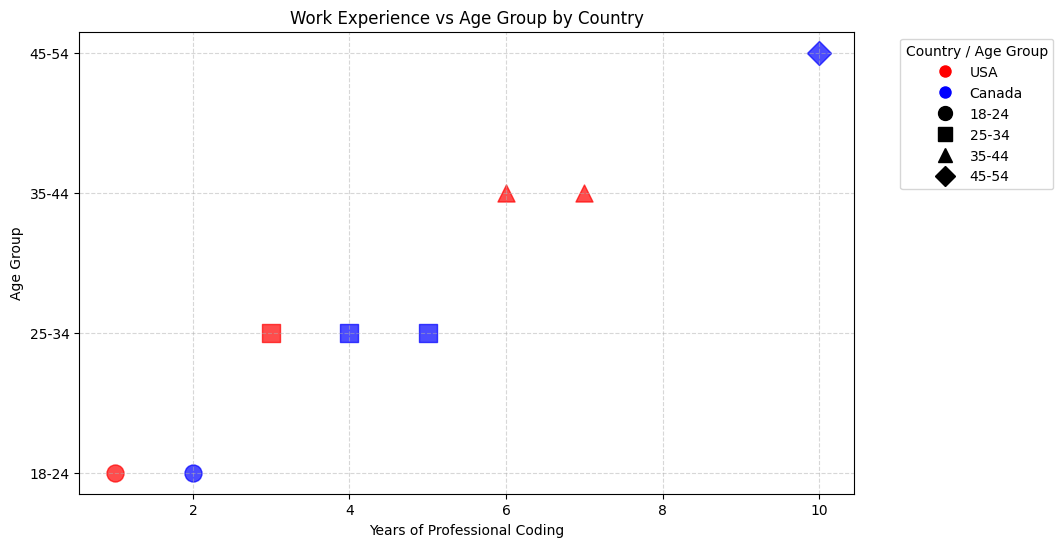

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: replace with your actual dataset
data = {
    'YearsCodePro': [1, 3, 5, 7, 2, 4, 6, 10],
    'Age': ['18-24', '25-34', '25-34', '35-44', '18-24', '25-34', '35-44', '45-54'],
    'Country': ['USA', 'USA', 'Canada', 'USA', 'Canada', 'Canada', 'USA', 'Canada']
}

df = pd.DataFrame(data)

# Assign colors for countries
countries = df['Country'].unique()
colors = ['red', 'blue', 'green', 'purple', 'orange']  # extend if needed
country_color_map = dict(zip(countries, colors[:len(countries)]))

# Assign markers for age groups
age_groups = df['Age'].unique()
markers = ['o', 's', '^', 'D', 'P']  # circle, square, triangle, diamond, plus
age_marker_map = dict(zip(age_groups, markers[:len(age_groups)]))

plt.figure(figsize=(10,6))

for _, row in df.iterrows():
    plt.scatter(row['YearsCodePro'], row['Age'],
                color=country_color_map[row['Country']],
                marker=age_marker_map[row['Age']],
                s=150, alpha=0.7)

# Create custom legends
from matplotlib.lines import Line2D

country_legend = [Line2D([0], [0], marker='o', color='w', label=c,
                         markerfacecolor=country_color_map[c], markersize=10)
                  for c in countries]

age_legend = [Line2D([0], [0], marker=age_marker_map[a], color='k', label=a,
                     linestyle='', markersize=10)
              for a in age_groups]

plt.legend(handles=country_legend + age_legend, title='Country / Age Group', bbox_to_anchor=(1.05, 1))
plt.xlabel('Years of Professional Coding')
plt.ylabel('Age Group')
plt.title('Work Experience vs Age Group by Country')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
